# USING PRETRAINED WORD EMBEDDINGS

In [1]:
import os
%matplotlib inline

imdb_dir = 'E:\\Datasets\\aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

# Load tha dataset

In [2]:
labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            try:
                f = open(os.path.join(dir_name, fname))
                texts.append(f.read())
                f.close()

                if label_type == 'neg':
                    labels.append(0)
                else:
                    labels.append(1)
            except:
                pass

In [3]:
print(len(labels))
print(len(texts))

24984
24984


In [4]:
print(labels[0])
print(texts[0])

0
Story of a man who has unnatural feelings for a pig. Starts out with a opening scene that is a terrific example of absurd comedy. A formal orchestra audience is turned into an insane, violent mob by the crazy chantings of it's singers. Unfortunately it stays absurd the WHOLE time with no general narrative eventually making it just too off putting. Even those from the era should be turned off. The cryptic dialogue would make Shakespeare seem easy to a third grader. On a technical level it's better than you might think with some good cinematography by future great Vilmos Zsigmond. Future stars Sally Kirkland and Frederic Forrest can be seen briefly.


# Tekenize the raw IMDB text data

In [5]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100
training_samples = 200
validation_samples = 10000
max_words = 10000

Using TensorFlow backend.


In [6]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

In [7]:
print(sequences[0])

[62, 4, 3, 129, 34, 45, 7674, 1413, 15, 3, 4281, 514, 43, 16, 3, 633, 133, 12, 6, 3, 1300, 460, 4, 1750, 209, 3, 7690, 308, 6, 677, 80, 32, 2138, 1110, 3017, 31, 1, 929, 4, 42, 5156, 469, 9, 2689, 1750, 1, 223, 55, 16, 54, 828, 1324, 856, 228, 9, 40, 96, 122, 1483, 56, 145, 36, 1, 997, 141, 26, 677, 122, 1, 412, 59, 94, 2279, 303, 773, 5, 3, 836, 20, 3, 1753, 646, 42, 125, 71, 22, 235, 101, 16, 46, 49, 624, 31, 709, 84, 709, 378, 3509, 2, 8511, 67, 26, 107, 3367]


In [8]:
word_index = tokenizer.word_index
print(word_index['a'])

3


In [9]:
print('Found %s unique tokens'%len(word_index))

Found 88413 unique tokens


In [10]:
data = pad_sequences(sequences, maxlen=maxlen)
labels = np.asarray(labels)

In [11]:
print(data[0])
print(labels[0])

[  34   45 7674 1413   15    3 4281  514   43   16    3  633  133   12    6
    3 1300  460    4 1750  209    3 7690  308    6  677   80   32 2138 1110
 3017   31    1  929    4   42 5156  469    9 2689 1750    1  223   55   16
   54  828 1324  856  228    9   40   96  122 1483   56  145   36    1  997
  141   26  677  122    1  412   59   94 2279  303  773    5    3  836   20
    3 1753  646   42  125   71   22  235  101   16   46   49  624   31  709
   84  709  378 3509    2 8511   67   26  107 3367]
0


In [12]:
print(data.shape)

(24984, 100)


In [13]:
print(labels.shape)

(24984,)


In [14]:
# Split the data into train and test, before that shuffles the data
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
print(indices)

[19659  6010 13072 ..., 12493 22036 22414]


In [15]:
data = data[indices]
labels = labels[indices]

In [16]:
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

In [17]:
print(x_train.shape)
print(x_val.shape)

(200, 100)
(10000, 100)


# Parsing the GloVe Word-embedding file

In [18]:
glove_dir = 'E:\\Datasets\\glove.6B'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding="utf8")

for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors' % len(embeddings_index))

Found 400000 word vectors


In [19]:
print(embeddings_index['a'])

[-0.27085999  0.044006   -0.02026    -0.17395     0.6444      0.71213001
  0.35510001  0.47138    -0.29637     0.54426998 -0.72294003 -0.0047612
  0.040611    0.043236    0.29729     0.10725     0.40156001 -0.53662002
  0.033382    0.067396    0.64556003 -0.085523    0.14103     0.094539
  0.74947    -0.19400001 -0.68739003 -0.41740999 -0.22807001  0.12       -0.48999
  0.80944997  0.045138   -0.11898     0.20161     0.39276001 -0.20121001
  0.31354001  0.75304002  0.25907001 -0.11566    -0.029319    0.93498999
 -0.36067     0.52420002  0.23706     0.52714998  0.22869    -0.51958001
 -0.79348999 -0.20367999 -0.50186998  0.18748     0.94282001 -0.44834
 -3.67919993  0.044183   -0.26751     2.19970012  0.241      -0.033425
  0.69553    -0.64472002 -0.0072277   0.89574999  0.20015     0.46493
  0.61932999 -0.1066      0.08691    -0.4623      0.18262    -0.15849
  0.020791    0.19373     0.063426   -0.31672999 -0.48177001 -1.38479996
  0.13669001  0.96859002  0.049965   -0.27379999 -0.0356

In [20]:
# Preparing GloVe word embeding matrix
embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))

for word, i in word_index.items():
    if i < max_words:
        # Get the vector from original GloVe data
        embedding_vector = embeddings_index.get(word)
        
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

print(embedding_matrix.shape)

(10000, 100)


# Defining the model

In [21]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


### Load the pretrained word embeddings into the Embedding layer

In [22]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

### Training the model

In [23]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

model.save_weights('pre_trained_glove_model.h5')

Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 1s - loss: 1.2011 - acc: 0.5100 - val_loss: 1.6288 - val_acc: 0.4986
Epoch 2/10
200/200 [==============================] - 0s - loss: 0.5512 - acc: 0.7950 - val_loss: 1.4903 - val_acc: 0.5015
Epoch 3/10
200/200 [==============================] - 0s - loss: 0.5797 - acc: 0.6750 - val_loss: 0.7189 - val_acc: 0.5366
Epoch 4/10
200/200 [==============================] - 0s - loss: 0.2312 - acc: 0.9250 - val_loss: 0.8337 - val_acc: 0.5273
Epoch 5/10
200/200 [==============================] - 0s - loss: 0.3543 - acc: 0.8450 - val_loss: 0.7386 - val_acc: 0.5549
Epoch 6/10
200/200 [==============================] - 0s - loss: 0.1071 - acc: 0.9850 - val_loss: 0.8795 - val_acc: 0.5330
Epoch 7/10
200/200 [==============================] - 0s - loss: 0.1051 - acc: 0.9950 - val_loss: 0.7117 - val_acc: 0.5733
Epoch 8/10
200/200 [==============================] - 0s - loss: 0.0404 - acc: 1.0000 - val

# plotting the result

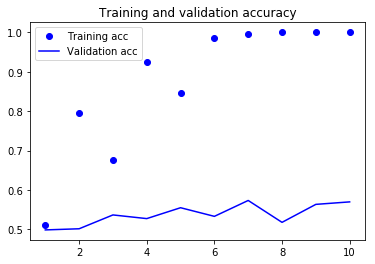

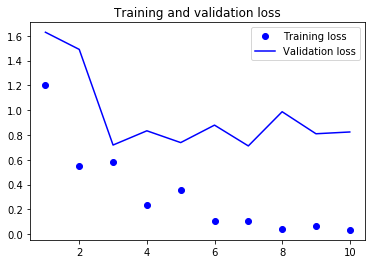

In [24]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Training the same model without pretrained word embeddngs

In [25]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 1s - loss: 0.6953 - acc: 0.5000 - val_loss: 0.6920 - val_acc: 0.5152
Epoch 2/10
200/200 [==============================] - 0s - loss: 0.5268 - acc: 0.9850 - val_loss: 0.6943 - val_acc: 0.5224
Epoch 3/10
200/200 [==============================] - 0s - loss: 0.3220 - acc: 0.9950 - val_loss: 0.6942 - val_acc: 0.5274
Epoch 4/10
200/200 [==============================] - 0s - loss: 0.1485 - acc: 1.0000 - val_loss: 0.7088 - val_acc: 0.5156
Epoch 5/10
200/200 [==============================] - 0s - loss: 0.0705 - acc: 1.0000 - val_loss: 0.7029 - val_acc: 0.5251
Epoch 6/10
200/200 [==============================] - 0s - loss: 0.0355 - acc: 1.0000 - val_loss: 0.7132 - val_acc: 0.5183
Epoch 7/10
200/200 [==============================] - 0s - loss: 0.0193 - acc: 1.0000 - val_loss: 0.7137 - val_acc: 0.5298
Epoch 8/10
200/200 [==============================] - 0s - loss: 0.0111 - acc: 1.0000 - val

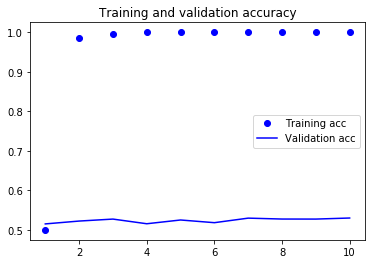

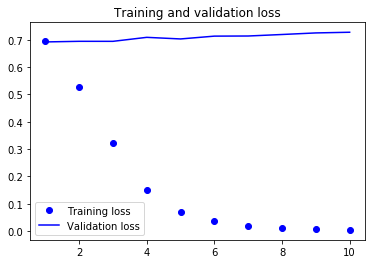

In [27]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Test the model on test set

In [28]:
test_dir = os.path.join(imdb_dir, 'test')

test_labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
                f = open(os.path.join(dir_name, fname), encoding='utf-8')
                texts.append(f.read())
                f.close()

                if label_type == 'neg':
                    test_labels.append(0)
                else:
                    test_labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)

x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(test_labels)

In [29]:
print(len(x_test))

25000


In [30]:
model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

24864/25000 [============================>.] - ETA: 0s

[0.80619690330505367, 0.57955999999999996]

# Let's see the situation with good amount of data

In [31]:
x_train = data[:20000]
y_train = labels[:20000]
x_val = data[20000: ]
y_val = labels[20000: ]

print(x_train.shape)
print(len(y_train))

print(x_val.shape)
print(len(y_val))

(20000, 100)
20000
(4984, 100)
4984


### Build the model and load pretrained embedding

In [36]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()


model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_4 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

model.save_weights('pre_trained_glove_model_with_all_data.h5')

Train on 20000 samples, validate on 4984 samples
Epoch 1/10
20000/20000 [==============================] - 3s - loss: 0.6593 - acc: 0.6383 - val_loss: 0.6065 - val_acc: 0.6736
Epoch 2/10
20000/20000 [==============================] - 3s - loss: 0.5319 - acc: 0.7398 - val_loss: 0.5394 - val_acc: 0.7315
Epoch 3/10
20000/20000 [==============================] - 3s - loss: 0.4689 - acc: 0.7778 - val_loss: 0.5376 - val_acc: 0.7360
Epoch 4/10
20000/20000 [==============================] - 3s - loss: 0.4301 - acc: 0.7967 - val_loss: 0.5749 - val_acc: 0.7161
Epoch 5/10
20000/20000 [==============================] - 3s - loss: 0.3864 - acc: 0.8220 - val_loss: 0.5961 - val_acc: 0.7211
Epoch 6/10
20000/20000 [==============================] - 3s - loss: 0.3493 - acc: 0.8413 - val_loss: 0.6519 - val_acc: 0.7225
Epoch 7/10
20000/20000 [==============================] - 3s - loss: 0.3096 - acc: 0.8608 - val_loss: 0.7461 - val_acc: 0.7002
Epoch 8/10
20000/20000 [==============================] - 3s -

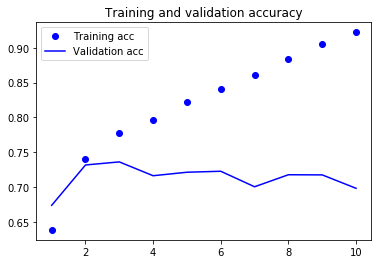

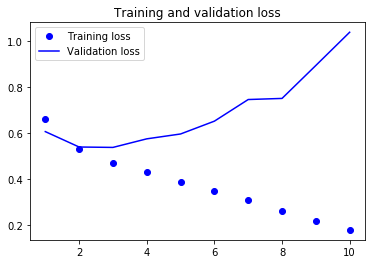

In [38]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [39]:
model.evaluate(x_test, y_test)

24352/25000 [============================>.] - ETA: 0s

[0.29369103060543539, 0.90576000000000001]

# Build the model without the pretrained embedding

In [40]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_5 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

model.save_weights('model_with_all_data.h5')

Train on 20000 samples, validate on 4984 samples
Epoch 1/10
20000/20000 [==============================] - 4s - loss: 0.4393 - acc: 0.7863 - val_loss: 0.3380 - val_acc: 0.8481
Epoch 2/10
20000/20000 [==============================] - 4s - loss: 0.1415 - acc: 0.9488 - val_loss: 0.4357 - val_acc: 0.8274
Epoch 3/10
20000/20000 [==============================] - 3s - loss: 0.0163 - acc: 0.9959 - val_loss: 0.6489 - val_acc: 0.8214
Epoch 4/10
20000/20000 [==============================] - 4s - loss: 0.0015 - acc: 0.9996 - val_loss: 0.8193 - val_acc: 0.8293
Epoch 5/10
20000/20000 [==============================] - 4s - loss: 7.7991e-05 - acc: 1.0000 - val_loss: 1.0112 - val_acc: 0.8285
Epoch 6/10
20000/20000 [==============================] - 4s - loss: 1.5154e-06 - acc: 1.0000 - val_loss: 1.1836 - val_acc: 0.8258
Epoch 7/10
20000/20000 [==============================] - 4s - loss: 2.2379e-07 - acc: 1.0000 - val_loss: 1.2364 - val_acc: 0.8218
Epoch 8/10
20000/20000 [==========================

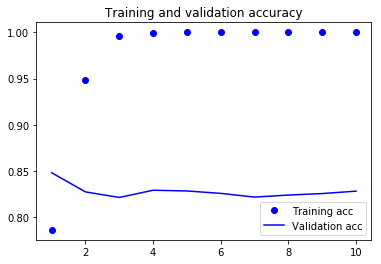

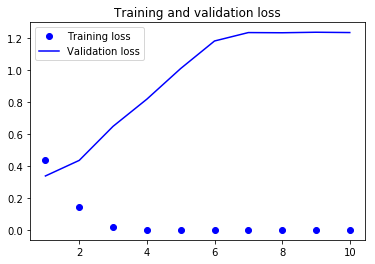

In [42]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [43]:
model.evaluate(x_test, y_test)

24608/25000 [============================>.] - ETA: 0s

[0.25173855400963946, 0.96508000000000005]